# Data-Driven Approach to Predict the Success of Bank Telemarketing

## Objective
The objective is to establish features/characteristics that help a bank identify whether a customer will subscribe to a term deposit or not 

## Evaluation Metric

- Area under Curve
- ROC
- F1 score

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## Exploration

The dataset has 20 features and a target. It is comprises of Numeric and categorical columns. The dataset has no missing data

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/komus/business_analytics/master/classification/bank-additional-full.csv", sep=";")
data.shape

(41188, 21)

In [9]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Age
The mean, minimum, and maximum age is 40, 17 and 98 years. The maximum age (98) is greater than 2 std (10) from the 75 percentile (47) of the distribution indicating that the age distribution has outliers (right skewed).

Reviewing Age with occupation revealed that the retired are the ones who have the highest median age while student are the lowest even though people with admin jobs have been contacted more by the bank


In [10]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

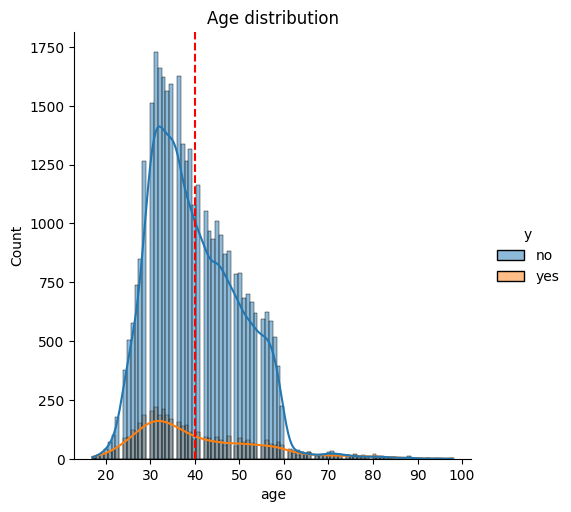

In [11]:
sns.displot(x = "age", data = data, hue="y", kde = True);
plt.title("Age distribution")
plt.axvline(x=data.age.mean(),
            color='red',
            ls='--', 
            lw=1.5);

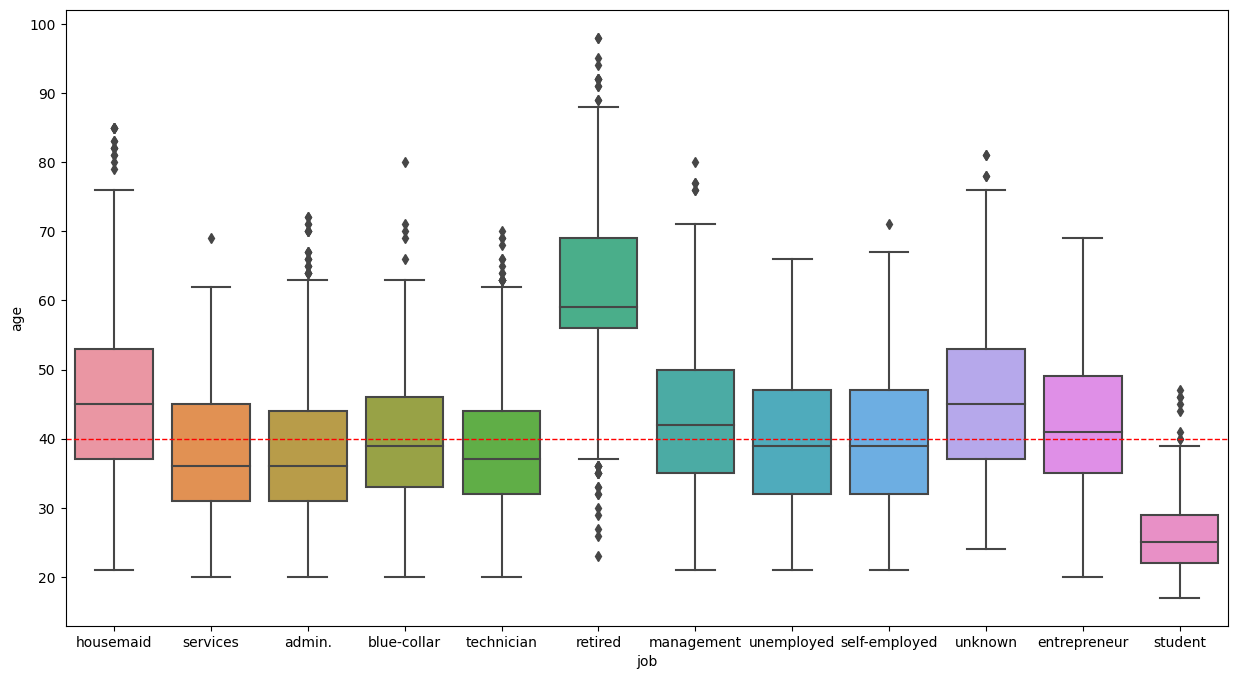

In [12]:
fig = plt.figure(figsize=(15,8))
sns.boxplot(data=data, x="job", y = "age");
plt.axhline(data.age.mean(), color='red',
            ls='--', 
            lw=1);

In [14]:
data.job.value_counts(normalize=True)

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64

### Marital

61% of the dataset are married

Text(0.5, 1.0, 'Marital Distribution')

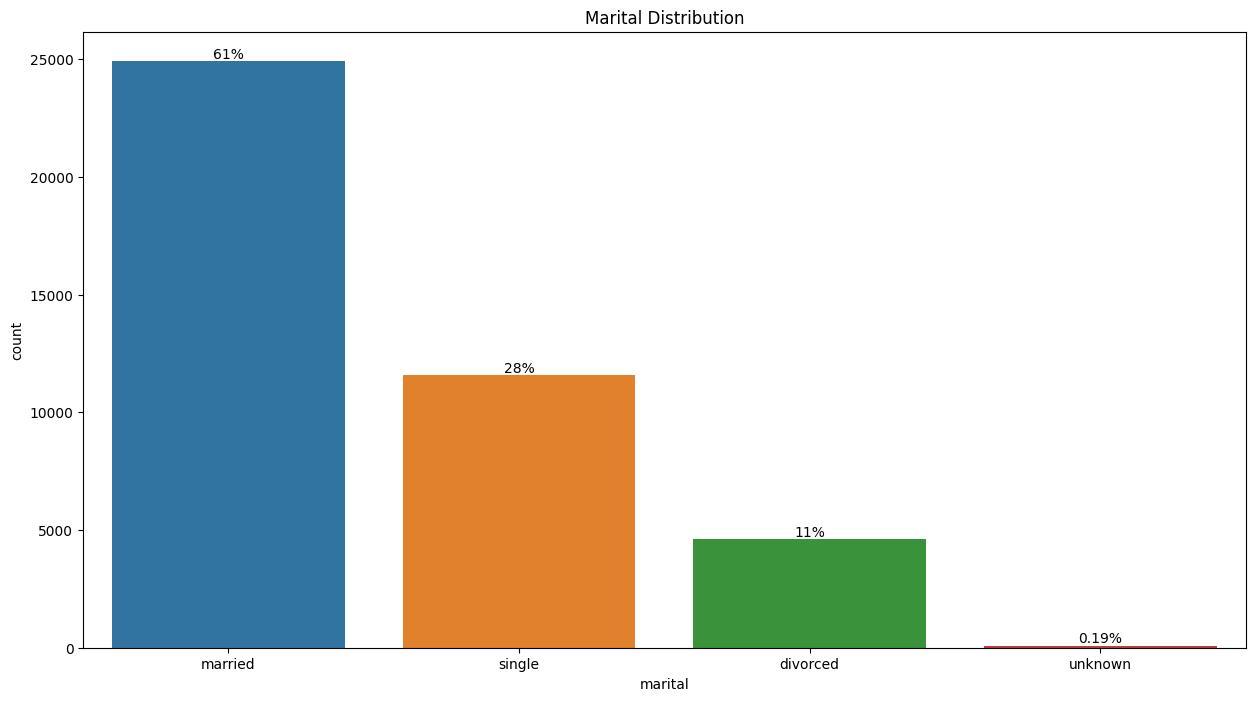

In [15]:
plt.figure(figsize=(15, 8))
g = sns.countplot(x="marital", data=data)
for p in g.patches:
  x = p.get_bbox().get_points()[:,0]
  y = p.get_bbox().get_points()[1,1]
  g.annotate('{:.2g}%'.format(100.*y/len(data)), (x.mean(), y), ha='center', va='bottom')
plt.title("Marital Distribution")

In [16]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Subscription - Target Variable

In [ ]:

sns.countplot
